<a href="https://colab.research.google.com/github/CLKim00/Machine-Learning/blob/main/HousePrice_Prediction_kaggle_competitions_copy_ADIL_MOHAMMED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## #Seaborn #Data Visualization #sklearn #Data Cleaning #Linear Regression

### Copy kaggle competition_House Prices - Advanced Regression Techniques_ADIL MOHAMMED
https://www.kaggle.com/code/adilmohammed/house-price-prediction

In [ ]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# reading the dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Remove column ID
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Handling

In [ ]:
# renaming columns
df.rename(columns={'BedroomAbvGr':'Bedroom', 'KitchenAbvGr':'Kitchen'}, inplace=True)

In [ ]:
# show columns bedroom and kitchen
df[['Bedroom', 'Kitchen']].head()

,Bedroom,Kitchen
0,3,1
1,3,1
2,3,1
3,3,1
4,4,1


In [ ]:
df['Bedroom'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: Bedroom, dtype: int64

### Data Cleaning

In [ ]:
# Columns which contains missing values
# without columns which contains missing values are 0
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
# droping miscfeature, alley, poolqc, fence
df.drop(['MiscFeature', 'Alley', 'PoolQC', 'Fence'], axis=1, inplace=True)

In [ ]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [ ]:
df.drop(['FireplaceQu'], axis=1, inplace=True)

In [ ]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
df.drop(['LotFrontage'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [ ]:
# filling missing values
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [ ]:
df['Electrical'].isnull().sum()

0

In [ ]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [ ]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

### Data Visualization

In [ ]:
# correlation between saleprice and other columns
# Correlation: In statistics it normally refers to the degree to which a pair of variables are linearly related.
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Bedroom          0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Kitchen         -0.135907
Name: SalePrice, dtype: float64

In [ ]:
# correlation between saleprice and bedroom
df[['Bedroom', 'SalePrice']].corr()

,Bedroom,SalePrice
Bedroom,1.000000,0.168213
SalePrice,0.168213,1.000000


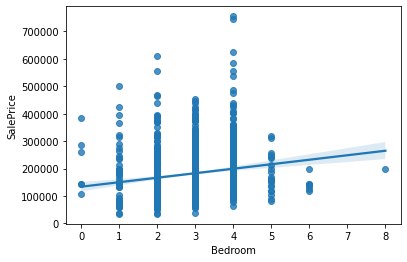

In [ ]:
# regplot to check if bedroom is negatively or positively proportional to saleprice
sns.regplot(x = 'Bedroom', y = 'SalePrice', data = df)

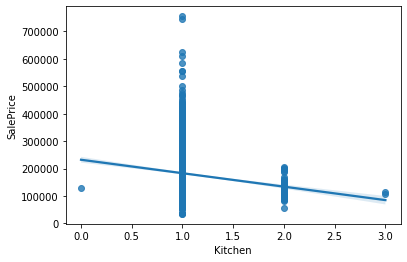

In [ ]:
sns.regplot(x = 'Kitchen', y = 'SalePrice', data = df)

In [ ]:
# row values of column kitchen which has value 0
df[df['Kitchen'] == 0]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,90,RL,9400,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,...,0,0,0,0,0,10,2006,WD,AdjLand,127500


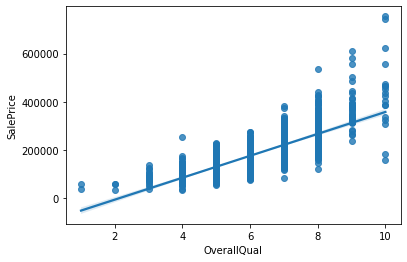

In [ ]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = df)

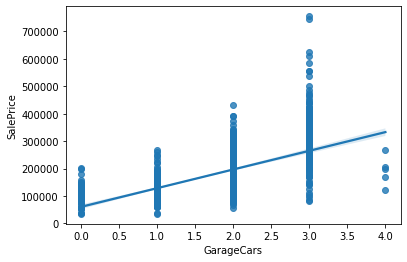

In [ ]:
sns.regplot(x = 'GarageCars', y = 'SalePrice', data = df)

### Model Development

Multi Linear Regression

In [ ]:
lm = LinearRegression()    # LinearRegression 모델 생성
features = ['OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
lm.fit(df[features], df['SalePrice'])    # fit(): 선형 회귀 모델에 필요한 기울기(line_fitter.coef_)와 절편(line_fitter.intercept_) 변수 전달

LinearRegression()

In [ ]:
lm.score(df[features], df['SalePrice'])

0.7736928402773303

In [ ]:
# pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(df[features], df['SalePrice'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
pipe.score(df[features], df['SalePrice'])

0.8693368685031404

Model Evaluation and Refinement

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# null of of features columns in test dataset
test_df[features].isnull().sum()[test_df[features].isnull().sum() > 0]

GarageCars     1
GarageArea     1
TotalBsmtSF    1
dtype: int64

In [ ]:
test_df['GarageArea'].fillna(test_df['GarageArea'].mean(), inplace=True)

In [ ]:
test_df['GarageCars'].fillna(test_df['GarageCars'].mean(), inplace=True)

In [ ]:
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(), inplace=True)

In [ ]:
# predicting the saleprice
yhat = pipe.predict(test_df[features])
yhat[0:5]

array([129774.23706381, 159064.12092644, 176578.56812784, 179490.0883082 ,
       199490.19113582])

In [ ]:
# saving the predicted values in csv file
'''submission = pd.DataFrame({'Id':test_df['Id'], 'SalePrice':yhat})
submission.to_csv('submission.csv', index=False)'''

"submission = pd.DataFrame({'Id':test_df['Id'], 'SalePrice':yhat})\nsubmission.to_csv('submission.csv', index=False)"

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(df[features], df['SalePrice'])
knn.score(df[features], df['SalePrice'])

0.8141810881317186

In [ ]:
predictions = knn.predict(test_df[features])

In [ ]:
'''submission = pd.DataFrame({'Id':test_df['Id'], 'SalePrice':predictions})
submission.to_csv('submission.csv', index=False)'''

"submission = pd.DataFrame({'Id':test_df['Id'], 'SalePrice':predictions})\nsubmission.to_csv('submission.csv', index=False)"

### Polynomial Regression

In [ ]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
train_input_poly = poly.fit_transform(df[features])
poly.fit(train_input_poly, df['SalePrice'])
lm.fit(train_input_poly, df['SalePrice'])
predictions = lm.predict(poly.fit_transform(test_df[features]))

### Ridge Model

In [ ]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(train_input_poly, df['SalePrice'])
predictions = RidgeModel.predict(poly.fit_transform(test_df[features]))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.78981e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
submission = pd.DataFrame({'Id':test_df['Id'], 'SalePrice':predictions})
submission.to_csv('submission.csv', index=False)